In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dataset = pd.read_csv('50_Startups.csv')

In [3]:
dataset.shape

(50, 5)

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [6]:
# Categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features=[3])
X = onehotencoder.fit_transform(X).toarray()

In [8]:
X[1:5]

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05]])

In [9]:
# Avoiding Dummy variable Trap
X = X[:, 1:]

In [10]:
X[1:5]

array([[0.0000000e+00, 0.0000000e+00, 1.6259770e+05, 1.5137759e+05,
        4.4389853e+05],
       [1.0000000e+00, 0.0000000e+00, 1.5344151e+05, 1.0114555e+05,
        4.0793454e+05],
       [0.0000000e+00, 1.0000000e+00, 1.4437241e+05, 1.1867185e+05,
        3.8319962e+05],
       [1.0000000e+00, 0.0000000e+00, 1.4210734e+05, 9.1391770e+04,
        3.6616842e+05]])

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
#Fitting the Random Forest Regression model to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor =RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

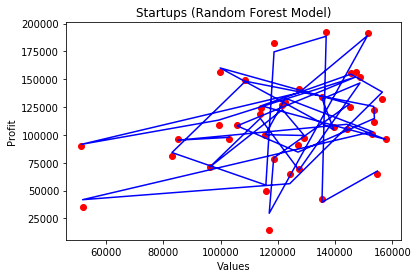

In [14]:
# Visualising the Random Forest results
plt.scatter(X_train[:, 3], y_train, color = 'red')
plt.plot(X_train[:, 3], regressor.predict(X_train), color = 'blue')
plt.title('Startups (Random Forest Model)')
plt.xlabel('Values')
plt.ylabel('Profit')
plt.show()

In [17]:
regressor.predict(X_test)

array([103214.25503333, 135965.76716667, 137054.23663333,  79886.67316667,
       183414.18916667, 113287.92596667,  69780.2935    ,  99513.17493333,
       111554.7308    , 168743.55913333])